In [1]:
#import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import math
from sklearn.linear_model import Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm
from sklearn.model_selection import cross_val_score

C:\Users\Garima\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
#Set working directory
os.chdir("C:/Users/Garima/Downloads/Edwisor/Project Bike Rental")

In [3]:
#load data
data_set = pd.read_csv("day.csv")

In [4]:
## Check dimension of the data
data_set.shape

(731, 16)

In [5]:
## let us have a look at the data
data_set.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [6]:
##Summary of the data
data_set.describe()
count_min = np.min(data_set["cnt"])#22
count_max = np.max(data_set["cnt"])#8714

In [7]:
##datatypes present in our data set
data_set.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [8]:
## we see features like instant is not relevant as it is just a serial number
## most of the useful data from dteday feature is already extracted like yr month workingday weekday
## casual and registered are leaky variables as stated in problem statement that cnt = casual + registered 
## Thus we remove these variables before proceeding further
data_set = data_set.drop(["instant","dteday","casual","registered"],axis=1)

In [9]:
## Let us seperate categorical and numerical data 
categorical_features = ["season","yr","mnth","holiday","weekday","workingday","weathersit"]
numerical_features = ["cnt","temp","atemp","hum","windspeed"]

In [10]:
#for i in categorical_features:
#    data_set[i] = data_set[i].astype('category')

In [11]:
data_set.dtypes

season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

In [12]:
## Missing value analysis 
data_set.isnull().sum()
## no missing value in the data

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

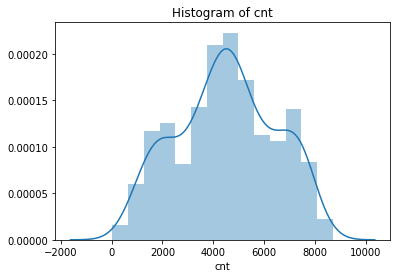

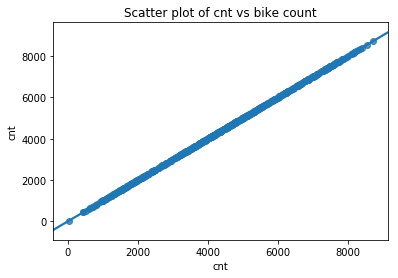

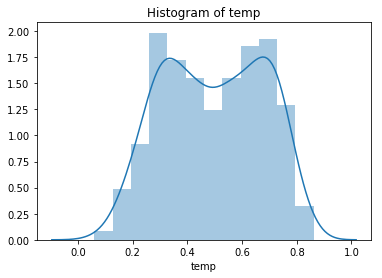

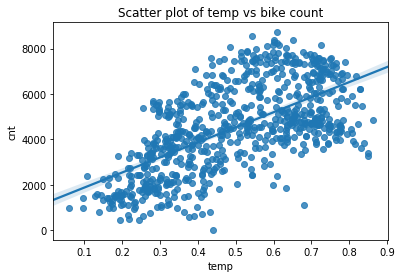

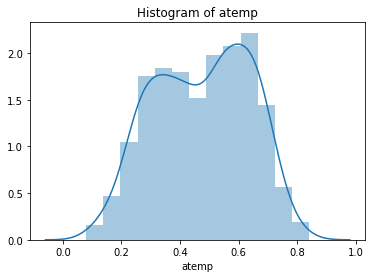

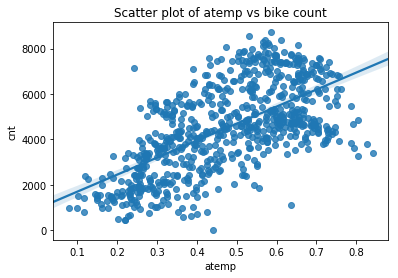

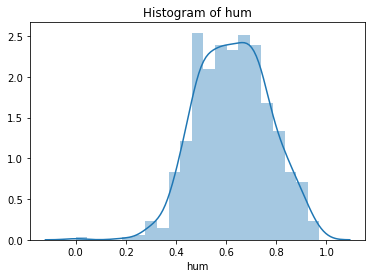

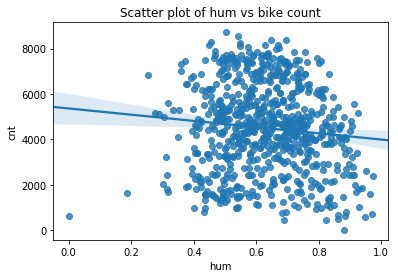

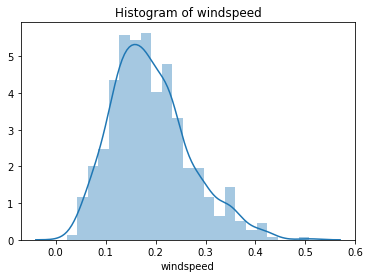

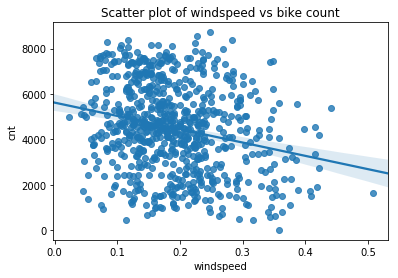

In [13]:
##Data visualisation
## numerical features
%matplotlib inline
for i in numerical_features:
    plot.figure()
    sns.distplot(data_set[i]).set_title("Histogram of "+i)
    plot.figure()
    sns.regplot(data_set[i],data_set["cnt"]).set_title("Scatter plot of "+i+" vs bike count")

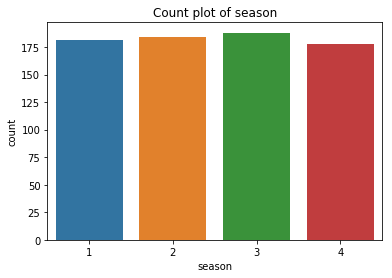

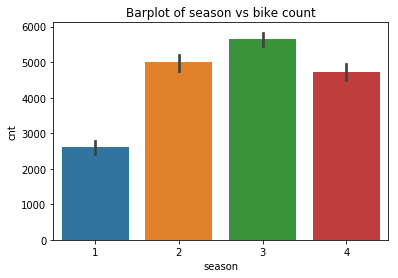

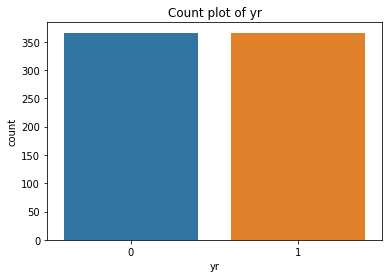

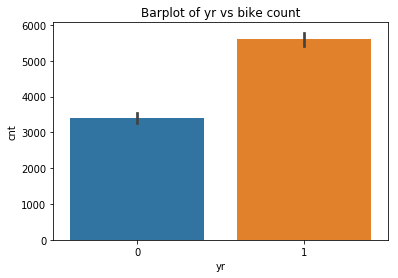

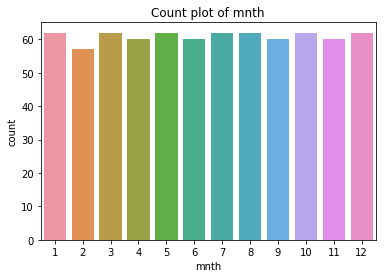

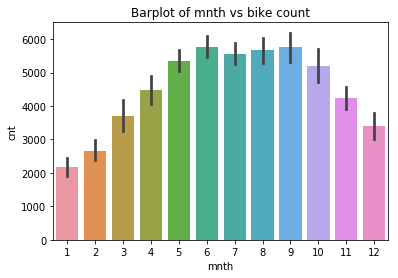

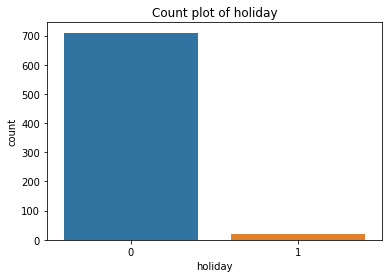

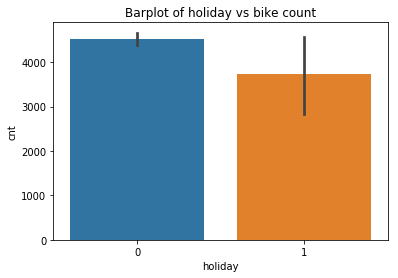

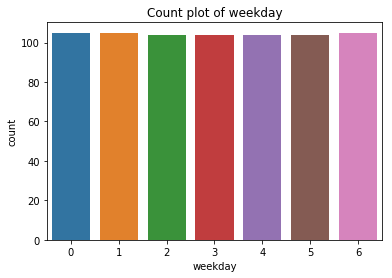

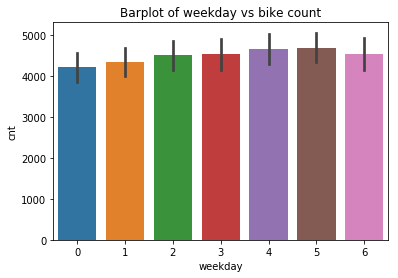

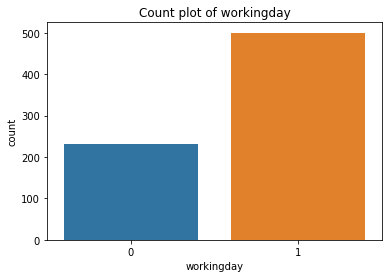

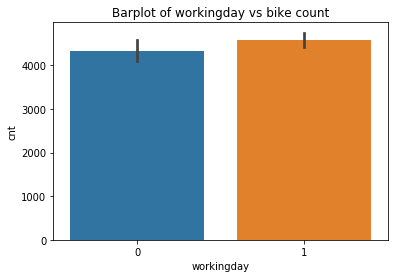

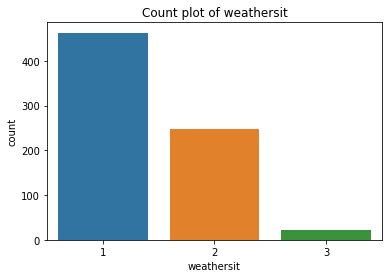

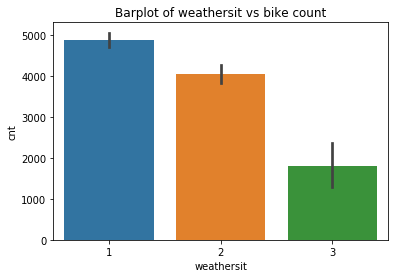

In [14]:
for i in categorical_features:
    plot.figure()
    sns.countplot(data_set[i]).set_title("Count plot of "+i )
    plot.figure()
    sns.barplot(data_set[i],data_set["cnt"]).set_title("Barplot of "+i+" vs bike count")
    

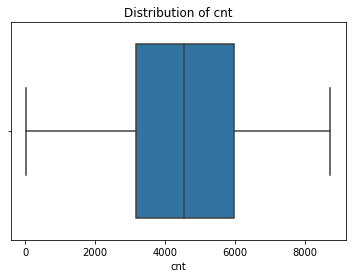

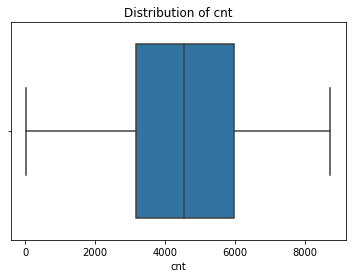

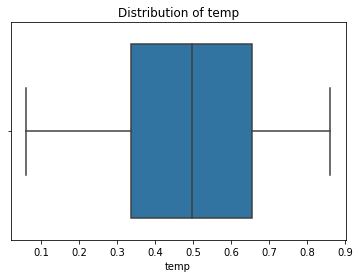

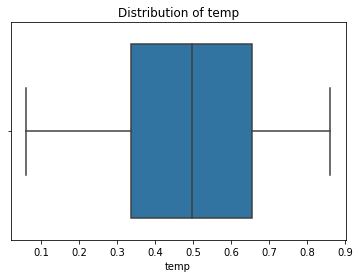

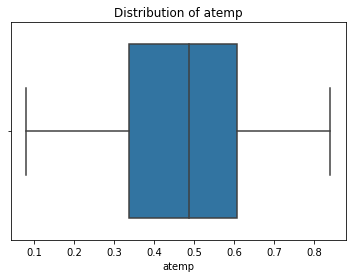

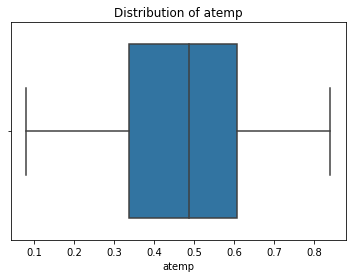

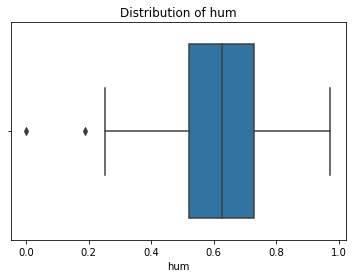

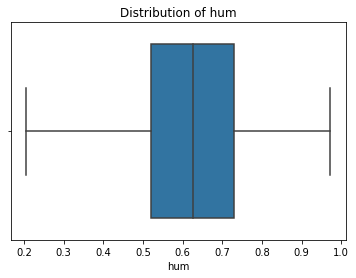

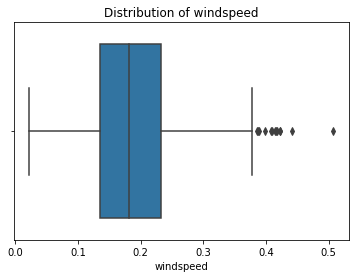

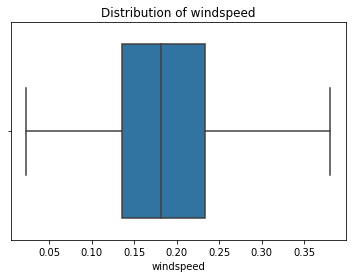

In [15]:
## Outlier 
## we would like to cap the outlier to upper and lower fence
for i in numerical_features:
    #print(i)
    q75,q25 = np.percentile(data_set.loc[:,i],[75,25])
    iqr = q75-q25
    
    min = q25-(1.5*iqr)
    max = q75+(1.5*iqr)
    
    plot.figure()
    sns.boxplot(data_set[i]).set_title("Distribution of" + " "+ i)
    
    data_set.loc[data_set.loc[:,i]<min,i] = min
    data_set.loc[data_set.loc[:,i]>max,i] = max
    
    plot.figure()
    sns.boxplot(data_set[i]).set_title("Distribution of" + " "+ i)

In [16]:
#feature scaling - normalisation 
data_set["cnt"] = (data_set["cnt"]-np.min(data_set["cnt"]))/(np.max(data_set["cnt"])-np.min(data_set["cnt"]))

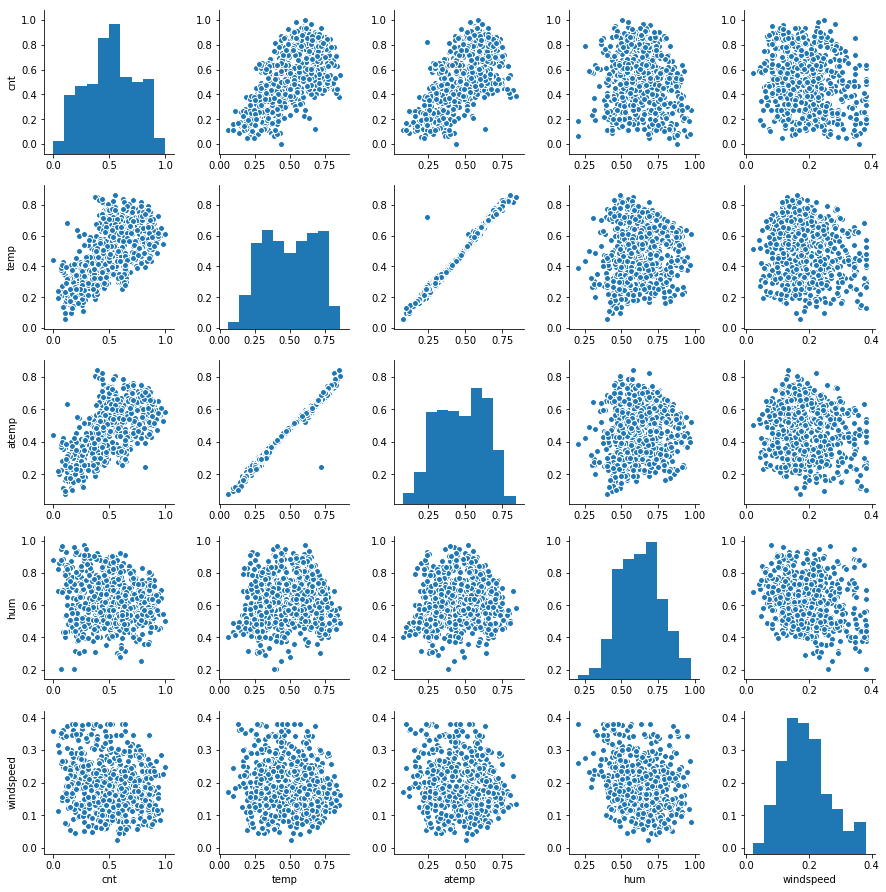

In [17]:
sns.pairplot(data_set[numerical_features])

,cnt,temp,atemp,hum,windspeed
cnt,1.000000,0.627494,0.631066,-0.105664,-0.233657
temp,0.627494,1.000000,0.991702,0.126722,-0.156916
atemp,0.631066,0.991702,1.000000,0.139924,-0.182948
hum,-0.105664,0.126722,0.139924,1.000000,-0.241160
windspeed,-0.233657,-0.156916,-0.182948,-0.241160,1.000000


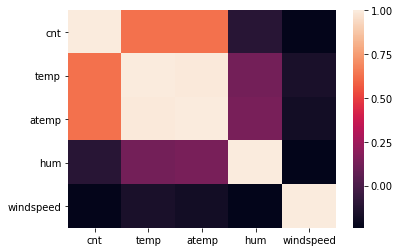

In [18]:
## Correlation 
sns.heatmap(data_set[numerical_features].corr())
data_set[numerical_features].corr()
## temp and atemp highly correlated

In [19]:
#multicollinearity
X = data_set[numerical_features].assign(const = 1)
pd.Series([variance_inflation_factor(X.values,i) for i in range(X.shape[1])],index=X.columns)
## temp and atemp shows multicollinearity

cnt           1.870477
temp         63.123945
atemp        64.081148
hum           1.178937
windspeed     1.184046
const        53.690600
dtype: float64

In [20]:
## anova test 
for i in categorical_features:
    print(i) 
    print(stats.f_oneway(data_set[i],data_set['cnt']))

season
F_onewayResult(statistic=2234.7131036468481, pvalue=1.1812270473734066e-296)
yr
F_onewayResult(statistic=0.54842192143257973, pvalue=0.45908229068105599)
mnth
F_onewayResult(statistic=2202.3890187080228, pvalue=7.2351429161856712e-294)
holiday
F_onewayResult(statistic=2233.4041277168758, pvalue=1.5301137528987259e-296)
weekday
F_onewayResult(statistic=1106.3742871546431, pvalue=4.742367523581619e-181)
workingday
F_onewayResult(statistic=77.813963359979383, pvalue=3.1624070118212319e-18)
weathersit
F_onewayResult(statistic=1632.0856144299062, pvalue=3.56582852113021e-240)


In [21]:
#temp and atemp shows collinearity hence one of them is removed
data_set = data_set.drop(["temp","yr"],axis=1)

In [22]:
data_set.columns

Index(['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit',
       'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [23]:
#for i in ['season','yr','mnth','holiday','weekday','workingday','weathersit']:
#    data_set[i] = data_set[i].astype('float64')

In [24]:
data_set.dtypes

season          int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
atemp         float64
hum           float64
windspeed     float64
cnt           float64
dtype: object

In [25]:
## dummies for categorical data set but they deterioted R2 as well as RMSE of the model
#data_set_dummies = pd.get_dummies(data_set)
#data_set.head(5)
#data_set_dummies.head(5)

In [26]:
##sampling
#Let us split our data into train and test ,with 75% data in the test set
data_set_test , data_set_train = train_test_split(data_set,test_size = 0.25)
data_set_train.shape
x_train = data_set_train.drop("cnt",axis = 1)
y_train = data_set_train["cnt"]
x_test = data_set_test.drop("cnt",axis = 1)
y_test = data_set_test["cnt"]

In [27]:
modelLR = sm.OLS(y_train,x_train,data = data_set_train).fit()
predictLR = modelLR.predict(x_test)
modelLR.summary(),math.sqrt(mean_squared_error(y_test,predictLR))

(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                    cnt   R-squared:                       0.920
 Model:                            OLS   Adj. R-squared:                  0.916
 Method:                 Least Squares   F-statistic:                     222.4
 Date:                Mon, 25 Feb 2019   Prob (F-statistic):           1.58e-90
 Time:                        14:09:16   Log-Likelihood:                 75.157
 No. Observations:                 183   AIC:                            -132.3
 Df Residuals:                     174   BIC:                            -103.4
 Df Model:                           9                                         
 Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
 ---------------------------------------------------------------------

In [28]:
# fitted values (need a constant term for intercept)
model_fitted_y = modelLR.fittedvalues

# model residuals
model_residuals = modelLR.resid

# normalized residuals
model_norm_residuals = modelLR.get_influence().resid_studentized_internal

# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# absolute residuals
model_abs_resid = np.abs(model_residuals)

# leverage, from statsmodels internals
model_leverage = modelLR.get_influence().hat_matrix_diag

# cook's distance, from statsmodels internals
model_cooks = modelLR.get_influence().cooks_distance[0]

Text(0,0.5,'Residuals')

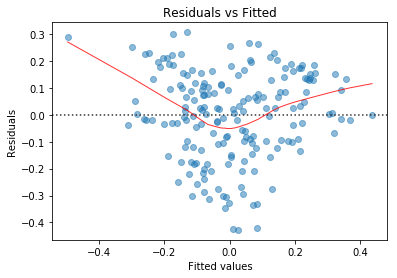

In [29]:
##Residual vs fitted plot 
plot_lm_1 = plot.figure(1)

plot_lm_1.axes[0] = sns.residplot(model_residuals, 'cnt', data=data_set_train, 
                          lowess=True, 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')

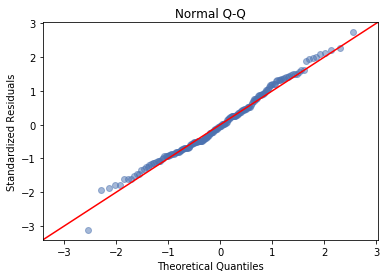

In [30]:
from statsmodels.graphics.gofplots import ProbPlot
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');

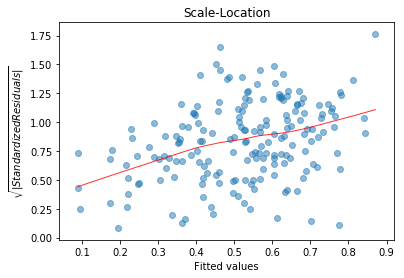

In [31]:
##Scale Location plot for heteroscedasticity check
from statsmodels.graphics.gofplots import ProbPlot

plot_lm_3 = plot.figure(3)
plot.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5)
sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

Text(0,0.5,'Standardized Residuals')

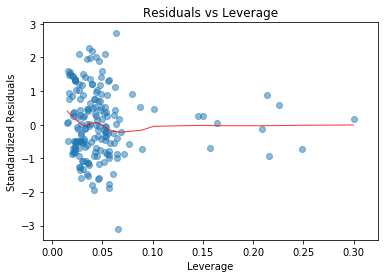

In [32]:
##Leverage Plot 
plot_lm_4 = plot.figure(4)
plot.scatter(model_leverage, model_norm_residuals, alpha=0.5)
sns.regplot(model_leverage, model_norm_residuals, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plot_lm_4.axes[0].set_title('Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals')

Regularisation

In [33]:
##sklearn.grid_search.GridSearchCV is constructed with an estimator, as well as a dictionary of parameter values to be searched. We can find the optimal parameters this way:
alphas = np.logspace(-3, -1, 30)
print(alphas)
for Model in [Ridge, Lasso]:
    gscv = GridSearchCV(Model(), dict(alpha=alphas), cv=5,scoring='r2').fit(x_train, y_train)
    print('Model %s:Best alpha: %s' % (Model.__name__, gscv.best_params_))
    print("R2:",gscv.best_score_)
    print("RMSE:",math.sqrt(mean_squared_error(y_test,gscv.predict(x_test))))

[ 0.001       0.0011721   0.00137382  0.00161026  0.00188739  0.00221222
  0.00259294  0.0030392   0.00356225  0.00417532  0.0048939   0.00573615
  0.00672336  0.00788046  0.00923671  0.01082637  0.01268961  0.01487352
  0.01743329  0.0204336   0.02395027  0.02807216  0.03290345  0.0385662
  0.04520354  0.05298317  0.06210169  0.07278954  0.08531679  0.1       ]


C:\Users\Garima\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Model Ridge:Best alpha: {'alpha': 0.10000000000000001}
R2: 0.452006960581
RMSE: 0.15695548046072494
Model Lasso:Best alpha: {'alpha': 0.001}
R2: 0.44365384561
RMSE: 0.1581962112941724


C:\Users\Garima\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [34]:
## Hyper tuning 
param_grid = {"max_depth":list(range(2,10,1)),'max_features': ['auto', 'sqrt', 'log2']}
modelDT = GridSearchCV(DecisionTreeRegressor(),param_grid,scoring='r2',cv=5)
modelDT.fit(x_train,y_train)
predictDT = modelDT.predict(x_test)
print(modelDT.best_params_)
print("RMSE:",math.sqrt(mean_squared_error(y_test,predictDT)),"R2:",modelDT.score(x_test,y_test))

{'max_depth': 3, 'max_features': 'auto'}
RMSE: 0.16899519330759327 R2: 0.43689883013


C:\Users\Garima\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [36]:
#Decision Tree
modelDT = DecisionTreeRegressor(max_depth=3,max_features='auto')
modelDT.fit(x_train,y_train)
#scores = cross_val_score(modelDT,x_train,y_train, scoring="r2", cv=5,n_jobs=1)
#print(scores)
predictDT = modelDT.predict(x_test)
#plot.scatter(y_test.index.values,y_test)
#plot.scatter(y_test.index.values,modelDT.predict(x_test))
print("RMSE:",math.sqrt(mean_squared_error(y_test,predictDT)),"R2:",modelDT.score(x_test,y_test))

RMSE: 0.1689951933075933 R2: 0.43689883013


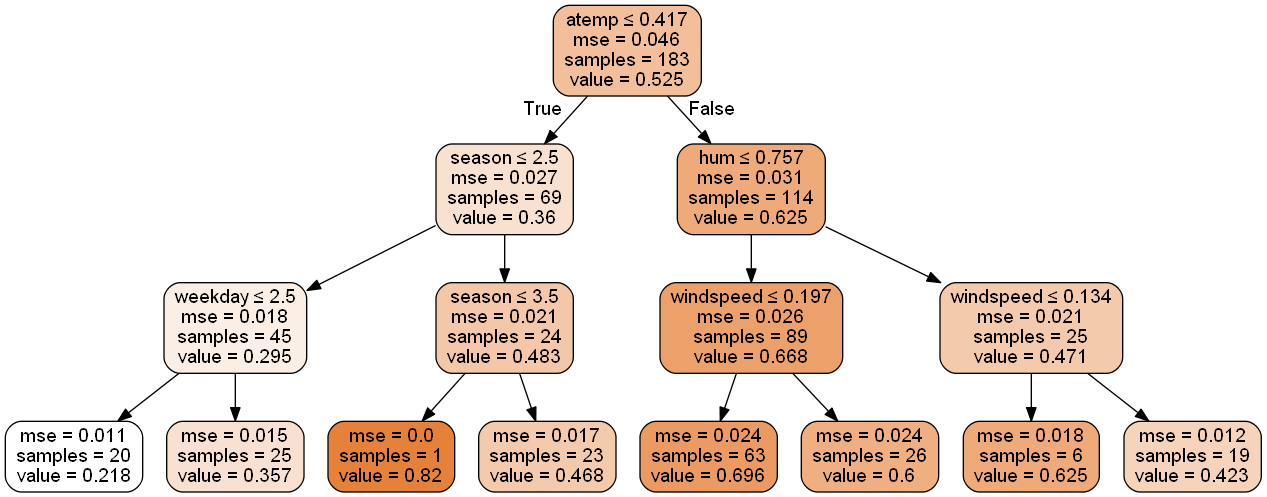

In [37]:
#!pip install graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.feature_extraction import DictVectorizer

dot_data = StringIO()
export_graphviz(modelDT.fit(x_train,y_train), out_file=dot_data,filled=True, rounded=True,special_characters=True,feature_names=x_train.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [38]:
print(dict(zip(data_set.columns, modelDT.feature_importances_)))

{'season': 0.13389120737427398, 'mnth': 0.0, 'holiday': 0.0, 'weekday': 0.042834317517759249, 'workingday': 0.0, 'weathersit': 0.0, 'atemp': 0.60046278278571585, 'hum': 0.15133098793579602, 'windspeed': 0.07148070438645486}


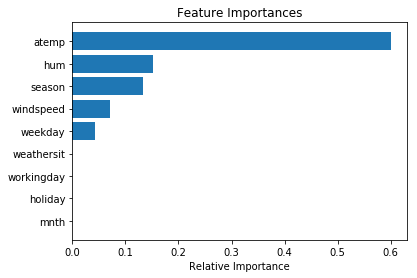

In [39]:
features = data_set.columns
importances = modelDT.feature_importances_
indices = np.argsort(importances)
plot.title('Feature Importances')
plot.barh(range(len(indices)), importances[indices])
plot.yticks(range(len(indices)), [features[i] for i in indices])
plot.xlabel('Relative Importance')
plot.show()

In [40]:
##Hypertuning parameter :
param_grid = {
    'bootstrap': [True],
    'max_depth': np.arange(2,10),
    'max_features': np.arange(2,9),
    'min_samples_leaf': np.arange(2,6),
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
# Fit the grid search to the data
grid_search.fit(x_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 1344 candidates, totalling 4032 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   23.2s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:   39.8s
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:   59.7s
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 3273 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 4032 out of 4032 | elapsed:  3.9min finished


{'bootstrap': True,
 'max_depth': 8,
 'max_features': 7,
 'min_samples_leaf': 2,
 'min_samples_split': 8,
 'n_estimators': 200}

In [41]:
#Random Forest 
modelRF = RandomForestRegressor(bootstrap = 'True',max_depth=8,n_estimators= 100,random_state=0,max_features=4,min_samples_leaf=2,min_samples_split=8)
modelRF.fit(x_train,y_train)
predictRF = modelRF.predict(x_test)
print("RMSE:",math.sqrt(mean_squared_error(y_test,predictRF)),"R2:",modelRF.score(x_test,y_test))

RMSE: 0.14690769369278558 R2: 0.574473308544


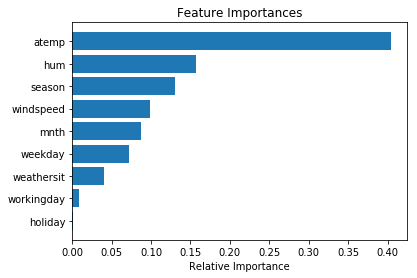

In [42]:
features = data_set.columns
importances = modelRF.feature_importances_
indices = np.argsort(importances)
plot.title('Feature Importances')
plot.barh(range(len(indices)), importances[indices])
plot.yticks(range(len(indices)), [features[i] for i in indices])
plot.xlabel('Relative Importance')
plot.show()

C:\Users\Garima\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


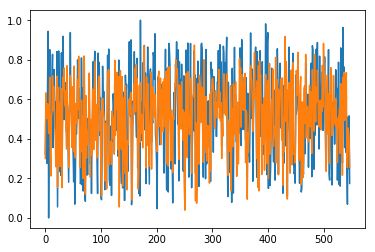

In [43]:
x = list(range(len(data_set_test.index)))
data_set_test["x"] = x
plot.plot(data_set_test["x"],data_set_test["cnt"],data_set_test["x"],predictLR)

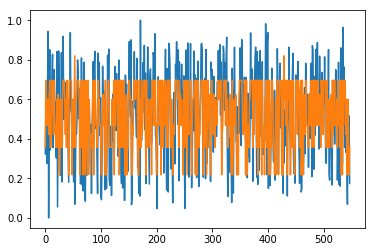

In [44]:
plot.plot(data_set_test["x"],data_set_test["cnt"],data_set_test["x"],predictDT)

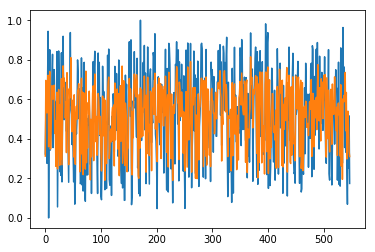

In [45]:
plot.plot(data_set_test["x"],data_set_test["cnt"],data_set_test["x"],predictRF)

In [46]:
##Generating sample data and storing in the sample.csv file
sample_data_train,sample_data_test = train_test_split(data_set,test_size = 0.50)
sample_data_X = sample_data_train.drop(["cnt"],axis=1)
modelRF_predict = modelRF.predict(sample_data_X)
math.sqrt(mean_squared_error(sample_data_train["cnt"],modelRF_predict))

0.13433027505086437

In [47]:
#sample data
sample_data_XY = sample_data_X
sample_data_XY["cnt"] = modelRF_predict*(count_max-count_min)+count_min
sample_data_XY["cnt"] = round(sample_data_XY["cnt"])
sample_data_XY.to_csv("Sample.csv")